In [2188]:
import requests
import bs4
from bs4 import BeautifulSoup

import pandas as pd
import numpy as np
import math
import re

import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import OneHotEncoder

from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier

## This statement allows the visuals to render within your Jupyter Notebook.
%matplotlib inline

In [2189]:
pd.set_option('display.max_columns', None)

## Load the data

In [2190]:
mal_df = pd.read_csv("Data\Sulaiman_page 15250_target 11.csv")

## 1. Data Profiling:


In [2191]:
mal_df.shape

(15262, 36)

In [2192]:
mal_df.head()

,Unnamed: 0,Synonyms,Japanese,Type,Episodes,Status,Aired,Premiered,Producers,Licensors,Studios,Source,Genres,Demographic,Duration,Rating,Score,Ranked,Popularity,Members,Favorites,description,Name,English Name,Recommended,Mixed Feelings,Not Recommended,French,Theme,English,Themes,German,Spanish,Genre,Broadcast,Demographics
0,0,Frieren at the Funeral,葬送のフリーレン,TV,28,Finished Airing,"Sep 29, 2023 to Mar 22, 2024",Fall 2023,"Aniplex, Dentsu, Shogakukan-Shueis...","None found, add some",Madhouse,Manga,"AdventureAdventure, DramaDrama, ...",ShounenShounen,24 min. per ep.,PG-13 - Teens 13 or older,"9.361 (scored by 412243412,243 users) 1 ...",#122 based on the top anime page. Please no...,#262,"755,522","43,111",During their decade-long quest to defeat the D...,Sousou no Frieren,Frieren: Beyond Journey's End,493 Recommended,67 Mixed Feelings,42 Not Recommended,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,NaN,鋼の錬金術師 FULLMETAL ALCHEMIST,TV,64,Finished Airing,"Apr 5, 2009 to Jul 4, 2010",Spring 2009,"Aniplex, Square Enix, Mainichi Bro...","Funimation, Aniplex of America",Bones,Manga,"ActionAction, AdventureAdventure, ...",ShounenShounen,24 min. per ep.,R - 17+ (violence & profanity),"9.091 (scored by 21271002,127,100 users) ...",#222 based on the top anime page. Please no...,#3,"3,356,509","226,182",After a horrific alchemy experiment goes wrong...,Fullmetal Alchemist: Brotherhood,NaN,912 Recommended,59 Mixed Feelings,39 Not Recommended,Fullmetal Alchemist Brotherhood,MilitaryMilitary,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,NaN,STEINS;GATE,TV,24,Finished Airing,"Apr 6, 2011 to Sep 14, 2011",Spring 2011,"Frontier Works, Media Factory, Kad...",Funimation,White Fox,Visual novel,"DramaDrama, Sci-FiSci-Fi, Susp...",NaN,24 min. per ep.,PG-13 - Teens 13 or older,"9.071 (scored by 14042041,404,204 users) ...",#322 based on the top anime page. Please no...,#13,"2,571,903","189,734",Eccentric scientist Rintarou Okabe has a never...,Steins;Gate,NaN,1006 Recommended,73 Mixed Feelings,73 Not Recommended,NaN,NaN,Steins;Gate,"PsychologicalPsychological, Time Trave...",NaN,NaN,NaN,NaN,NaN
3,3,Gintama' (2015),銀魂°,TV,51,Finished Airing,"Apr 8, 2015 to Mar 30, 2016",Spring 2015,"TV Tokyo, Aniplex, Dentsu","Funimation, Crunchyroll",Bandai Namco Pictures,Manga,"ActionAction, ComedyComedy, Sc...",ShounenShounen,24 min. per ep.,PG-13 - Teens 13 or older,"9.061 (scored by 252236252,236 users) 1 ...",#422 based on the top anime page. Please no...,#343,"633,237","16,680","Gintoki, Shinpachi, and Kagura return as the f...",Gintama°,Gintama Season 4,79 Recommended,3 Mixed Feelings,1 Not Recommended,Gintama Saison 4,NaN,Gintama Season 4,"Gag HumorGag Humor, HistoricalHistoric...",Gintama Season 4,Gintama Temporada 4,NaN,NaN,NaN
4,4,NaN,進撃の巨人 Season3 Part.2,TV,10,Finished Airing,"Apr 29, 2019 to Jul 1, 2019",Spring 2019,"Production I.G, Dentsu, Mainichi B...",Funimation,Wit Studio,Manga,"ActionAction, DramaDrama, Susp...",ShounenShounen,23 min. per ep.,R - 17+ (violence & profanity),"9.051 (scored by 15947041,594,704 users) ...",#522 based on the top anime page. Please no...,#21,"2,287,984","58,793",Seeking to restore humanity's diminishing hope...,Shingeki no Kyojin Season 3 Part 2,Attack on Titan Season 3 Part 2,198 Recommended,9 Mixed Feelings,11 Not Recommended,L'Attaque des Titans Saison 3 Partie 2,NaN,Attack on Titan Season 3 Part 2,"GoreGore, MilitaryMilitary, Su...",Attack on Titan Staffel 3 Teil 2,Ataque a los Titanes Temporada 3 Parte 2,NaN,NaN,NaN


In [2193]:
mal_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15262 entries, 0 to 15261
Data columns (total 36 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Unnamed: 0       15262 non-null  int64 
 1   Synonyms         6453 non-null   object
 2   Japanese         15047 non-null  object
 3   Type             15262 non-null  object
 4   Episodes         15262 non-null  object
 5   Status           15262 non-null  object
 6   Aired            15262 non-null  object
 7   Premiered        5527 non-null   object
 8   Producers        15262 non-null  object
 9   Licensors        15262 non-null  object
 10  Studios          15253 non-null  object
 11  Source           15262 non-null  object
 12  Genres           9232 non-null   object
 13  Demographic      5498 non-null   object
 14  Duration         15262 non-null  object
 15  Rating           15122 non-null  object
 16  Score            15262 non-null  object
 17  Ranked           15262 non-null

#### 1. Reliability:
The data source is reliable since most people get anime information from MyAnimeList

#### 2. Timeliness: 
The data is up to date to this current season of anime

#### 3. Consistency: 


#### 4. Relevance: 
The data is relevance to us in a sense that it contains all the top tier anime and the niche ones a like

In [2194]:
mal_df.head(1)

,Unnamed: 0,Synonyms,Japanese,Type,Episodes,Status,Aired,Premiered,Producers,Licensors,Studios,Source,Genres,Demographic,Duration,Rating,Score,Ranked,Popularity,Members,Favorites,description,Name,English Name,Recommended,Mixed Feelings,Not Recommended,French,Theme,English,Themes,German,Spanish,Genre,Broadcast,Demographics
0,0,Frieren at the Funeral,葬送のフリーレン,TV,28,Finished Airing,"Sep 29, 2023 to Mar 22, 2024",Fall 2023,"Aniplex, Dentsu, Shogakukan-Shueis...","None found, add some",Madhouse,Manga,"AdventureAdventure, DramaDrama, ...",ShounenShounen,24 min. per ep.,PG-13 - Teens 13 or older,"9.361 (scored by 412243412,243 users) 1 ...",#122 based on the top anime page. Please no...,#262,"755,522","43,111",During their decade-long quest to defeat the D...,Sousou no Frieren,Frieren: Beyond Journey's End,493 Recommended,67 Mixed Feelings,42 Not Recommended,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [2195]:
#Remove the Unnamed column since it is useless and irrelevant 
mal_df.drop(columns='Unnamed: 0', axis=1, inplace= True)
mal_df.drop(columns='Synonyms', axis=1, inplace= True)
mal_df.drop(columns='French', axis=1, inplace= True)
mal_df.drop(columns='Spanish', axis=1, inplace= True)
mal_df.drop(columns='German', axis=1, inplace= True)
mal_df.drop(columns='Broadcast', axis=1, inplace= True)
mal_df.head(1)

,Japanese,Type,Episodes,Status,Aired,Premiered,Producers,Licensors,Studios,Source,Genres,Demographic,Duration,Rating,Score,Ranked,Popularity,Members,Favorites,description,Name,English Name,Recommended,Mixed Feelings,Not Recommended,Theme,English,Themes,Genre,Demographics
0,葬送のフリーレン,TV,28,Finished Airing,"Sep 29, 2023 to Mar 22, 2024",Fall 2023,"Aniplex, Dentsu, Shogakukan-Shueis...","None found, add some",Madhouse,Manga,"AdventureAdventure, DramaDrama, ...",ShounenShounen,24 min. per ep.,PG-13 - Teens 13 or older,"9.361 (scored by 412243412,243 users) 1 ...",#122 based on the top anime page. Please no...,#262,"755,522","43,111",During their decade-long quest to defeat the D...,Sousou no Frieren,Frieren: Beyond Journey's End,493 Recommended,67 Mixed Feelings,42 Not Recommended,NaN,NaN,NaN,NaN,NaN


### Data Cleaning 
We can't go through the next steps without doing some cleaning first 

In [2196]:
mal_df.head(2)

,Japanese,Type,Episodes,Status,Aired,Premiered,Producers,Licensors,Studios,Source,Genres,Demographic,Duration,Rating,Score,Ranked,Popularity,Members,Favorites,description,Name,English Name,Recommended,Mixed Feelings,Not Recommended,Theme,English,Themes,Genre,Demographics
0,葬送のフリーレン,TV,28,Finished Airing,"Sep 29, 2023 to Mar 22, 2024",Fall 2023,"Aniplex, Dentsu, Shogakukan-Shueis...","None found, add some",Madhouse,Manga,"AdventureAdventure, DramaDrama, ...",ShounenShounen,24 min. per ep.,PG-13 - Teens 13 or older,"9.361 (scored by 412243412,243 users) 1 ...",#122 based on the top anime page. Please no...,#262,"755,522","43,111",During their decade-long quest to defeat the D...,Sousou no Frieren,Frieren: Beyond Journey's End,493 Recommended,67 Mixed Feelings,42 Not Recommended,NaN,NaN,NaN,NaN,NaN
1,鋼の錬金術師 FULLMETAL ALCHEMIST,TV,64,Finished Airing,"Apr 5, 2009 to Jul 4, 2010",Spring 2009,"Aniplex, Square Enix, Mainichi Bro...","Funimation, Aniplex of America",Bones,Manga,"ActionAction, AdventureAdventure, ...",ShounenShounen,24 min. per ep.,R - 17+ (violence & profanity),"9.091 (scored by 21271002,127,100 users) ...",#222 based on the top anime page. Please no...,#3,"3,356,509","226,182",After a horrific alchemy experiment goes wrong...,Fullmetal Alchemist: Brotherhood,NaN,912 Recommended,59 Mixed Feelings,39 Not Recommended,MilitaryMilitary,NaN,NaN,NaN,NaN


##### Cleaning the ranked column

In [2197]:
mal_df['Ranked'] = mal_df['Ranked'].apply(lambda x: int(x.split()[0][1:-2]))

print(mal_df)

                         Japanese   Type Episodes           Status  \
0                        葬送のフリーレン     TV       28  Finished Airing   
1      鋼の錬金術師 FULLMETAL ALCHEMIST     TV       64  Finished Airing   
2                     STEINS;GATE     TV       24  Finished Airing   
3                             銀魂°     TV       51  Finished Airing   
4            進撃の巨人 Season3 Part.2     TV       10  Finished Airing   
...                           ...    ...      ...              ...   
15257                        找小哥哥  Movie        1  Finished Airing   
15258                       这是一首歌  Movie        1  Finished Airing   
15259                        浙水千秋    ONA        6  Finished Airing   
15260                  这个年纪还能当大侠吗    ONA       10  Finished Airing   
15261                     这个女生很普通    ONA       11  Finished Airing   

                              Aired    Premiered  \
0      Sep 29, 2023 to Mar 22, 2024    Fall 2023   
1        Apr 5, 2009 to Jul 4, 2010  Spring 2009   
2  

In [2198]:
mal_df.tail(1)

,Japanese,Type,Episodes,Status,Aired,Premiered,Producers,Licensors,Studios,Source,Genres,Demographic,Duration,Rating,Score,Ranked,Popularity,Members,Favorites,description,Name,English Name,Recommended,Mixed Feelings,Not Recommended,Theme,English,Themes,Genre,Demographics
15261,这个女生很普通,ONA,11,Finished Airing,2015 to ?,NaN,"None found, add some","None found, add some","None found, add some",Original,NaN,NaN,4 min. per ep.,PG-13 - Teens 13 or older,N/A1 (scored by - users) 1 indic...,15262,#26405,57,0,No synopsis information has been added to this...,Zhege Nusheng Hen Putong,NaN,0 Recommended,0 Mixed Feelings,0 Not Recommended,NaN,NaN,NaN,ComedyComedy,NaN


##### Cleaning the score

In [2199]:
def extract_number(text):

    numbers = re.findall(r'\d+', text)
    if numbers:
        return numbers[0]
    else:
        return None

In [2200]:
#Get score by index using regex
mal_df['Score'] = mal_df['Score'].astype(str).str.extract(r'(\d+.\d+)')
mal_df['Score'] = pd.to_numeric(mal_df['Score'])
mal_df['Score'].head(5)

0    9.361
1    9.091
2    9.071
3    9.061
4    9.051
Name: Score, dtype: float64

In [2201]:
mal_df['Score'].fillna(0, inplace=True)

#### Cleaning Members

In [2202]:
mal_df['Members'] = mal_df['Members'].astype(str).str.replace(',', '')
mal_df['Favorites'] = mal_df['Favorites'].astype(str).str.replace(',', '')

mal_df['Members'] = pd.to_numeric(mal_df['Members'], errors='coerce')
mal_df['Favorites'] = pd.to_numeric(mal_df['Favorites'], errors='coerce')

In [2203]:
mal_df.head(2)

,Japanese,Type,Episodes,Status,Aired,Premiered,Producers,Licensors,Studios,Source,Genres,Demographic,Duration,Rating,Score,Ranked,Popularity,Members,Favorites,description,Name,English Name,Recommended,Mixed Feelings,Not Recommended,Theme,English,Themes,Genre,Demographics
0,葬送のフリーレン,TV,28,Finished Airing,"Sep 29, 2023 to Mar 22, 2024",Fall 2023,"Aniplex, Dentsu, Shogakukan-Shueis...","None found, add some",Madhouse,Manga,"AdventureAdventure, DramaDrama, ...",ShounenShounen,24 min. per ep.,PG-13 - Teens 13 or older,9.361,1,#262,755522,43111,During their decade-long quest to defeat the D...,Sousou no Frieren,Frieren: Beyond Journey's End,493 Recommended,67 Mixed Feelings,42 Not Recommended,NaN,NaN,NaN,NaN,NaN
1,鋼の錬金術師 FULLMETAL ALCHEMIST,TV,64,Finished Airing,"Apr 5, 2009 to Jul 4, 2010",Spring 2009,"Aniplex, Square Enix, Mainichi Bro...","Funimation, Aniplex of America",Bones,Manga,"ActionAction, AdventureAdventure, ...",ShounenShounen,24 min. per ep.,R - 17+ (violence & profanity),9.091,2,#3,3356509,226182,After a horrific alchemy experiment goes wrong...,Fullmetal Alchemist: Brotherhood,NaN,912 Recommended,59 Mixed Feelings,39 Not Recommended,MilitaryMilitary,NaN,NaN,NaN,NaN


In [2204]:
mal_df.dtypes

Japanese            object
Type                object
Episodes            object
Status              object
Aired               object
Premiered           object
Producers           object
Licensors           object
Studios             object
Source              object
Genres              object
Demographic         object
Duration            object
Rating              object
Score              float64
Ranked               int64
Popularity          object
Members              int64
Favorites            int64
description         object
Name                object
English Name        object
Recommended         object
Mixed Feelings      object
Not Recommended     object
Theme               object
English             object
Themes              object
Genre               object
Demographics        object
dtype: object

#### Cleaning Episodes

In [2205]:
def clean_episode(episode):
    if episode == 'Unknown':
        return episode
    return int(episode)


In [2206]:
mal_df['Episodes'] = mal_df['Episodes'].map(clean_episode)

mal_df.dtypes

Japanese            object
Type                object
Episodes            object
Status              object
Aired               object
Premiered           object
Producers           object
Licensors           object
Studios             object
Source              object
Genres              object
Demographic         object
Duration            object
Rating              object
Score              float64
Ranked               int64
Popularity          object
Members              int64
Favorites            int64
description         object
Name                object
English Name        object
Recommended         object
Mixed Feelings      object
Not Recommended     object
Theme               object
English             object
Themes              object
Genre               object
Demographics        object
dtype: object

In [2207]:
mal_df.head(1)

,Japanese,Type,Episodes,Status,Aired,Premiered,Producers,Licensors,Studios,Source,Genres,Demographic,Duration,Rating,Score,Ranked,Popularity,Members,Favorites,description,Name,English Name,Recommended,Mixed Feelings,Not Recommended,Theme,English,Themes,Genre,Demographics
0,葬送のフリーレン,TV,28,Finished Airing,"Sep 29, 2023 to Mar 22, 2024",Fall 2023,"Aniplex, Dentsu, Shogakukan-Shueis...","None found, add some",Madhouse,Manga,"AdventureAdventure, DramaDrama, ...",ShounenShounen,24 min. per ep.,PG-13 - Teens 13 or older,9.361,1,#262,755522,43111,During their decade-long quest to defeat the D...,Sousou no Frieren,Frieren: Beyond Journey's End,493 Recommended,67 Mixed Feelings,42 Not Recommended,NaN,NaN,NaN,NaN,NaN


##### Cleaning Recomendation 

In [2208]:
mal_df['Recommended'] = mal_df['Recommended'].apply(extract_number).astype(int)
mal_df['Mixed Feelings'] = mal_df['Mixed Feelings'].apply(extract_number).astype(int)
mal_df['Not Recommended'] = mal_df['Not Recommended'].apply(extract_number)

mal_df.head(1)

,Japanese,Type,Episodes,Status,Aired,Premiered,Producers,Licensors,Studios,Source,Genres,Demographic,Duration,Rating,Score,Ranked,Popularity,Members,Favorites,description,Name,English Name,Recommended,Mixed Feelings,Not Recommended,Theme,English,Themes,Genre,Demographics
0,葬送のフリーレン,TV,28,Finished Airing,"Sep 29, 2023 to Mar 22, 2024",Fall 2023,"Aniplex, Dentsu, Shogakukan-Shueis...","None found, add some",Madhouse,Manga,"AdventureAdventure, DramaDrama, ...",ShounenShounen,24 min. per ep.,PG-13 - Teens 13 or older,9.361,1,#262,755522,43111,During their decade-long quest to defeat the D...,Sousou no Frieren,Frieren: Beyond Journey's End,493,67,42,NaN,NaN,NaN,NaN,NaN


#### Cleaning Popularity

In [2209]:
mal_df['Popularity'] = mal_df['Popularity'].str.replace('#', '').astype(int)

#### Filling rating

In [2210]:
mal_df['Rating'].fillna("Unknown", inplace=True)

##### Cleaning the genres

In [2211]:
mal_df['Genre'].unique()

array([nan, 'DramaDrama', 'ActionAction', 'ComedyComedy', 'SportsSports',
       'Slice of LifeSlice of Life', 'AdventureAdventure',
       'Boys LoveBoys Love', 'SuspenseSuspense', 'RomanceRomance',
       'FantasyFantasy', 'MysteryMystery', 'GourmetGourmet',
       'SupernaturalSupernatural', 'Girls LoveGirls Love', 'Sci-FiSci-Fi',
       'Avant GardeAvant Garde', 'Award WinningAward Winning',
       'EcchiEcchi', 'HorrorHorror'], dtype=object)

In [2212]:
mal_df[(mal_df['Genre'].notnull()) & (mal_df['Genres'].notnull())]

,Japanese,Type,Episodes,Status,Aired,Premiered,Producers,Licensors,Studios,Source,Genres,Demographic,Duration,Rating,Score,Ranked,Popularity,Members,Favorites,description,Name,English Name,Recommended,Mixed Feelings,Not Recommended,Theme,English,Themes,Genre,Demographics


In [2213]:
# Fill the Null values in genres with the genre values in the same row
mal_df['Genres'] = mal_df['Genres'].fillna(mal_df['Genre'])

In [2214]:
mal_df['Genres'].isnull().sum()

1249

In [2215]:
def clean_genres(genres):
    #check first if the genres not empty
    if type(genres) == float:
        return ["Unknown-Genre"]
    
    genres_list = []
    genres = genres.replace(" ", '').split(',')
    for g in genres:
        #print(g)
        genres_list.append(g[:len(g)//2])
    
    return genres_list

In [2216]:
mal_df['Genres'] = mal_df['Genres'].map(clean_genres)

In [2217]:
mal_df['Genres'].isnull().sum()

0

##### Cleaning the Demographics

In [2218]:
mal_df[(mal_df['Demographic'].notnull()) & (mal_df['Demographics'].notnull())]

,Japanese,Type,Episodes,Status,Aired,Premiered,Producers,Licensors,Studios,Source,Genres,Demographic,Duration,Rating,Score,Ranked,Popularity,Members,Favorites,description,Name,English Name,Recommended,Mixed Feelings,Not Recommended,Theme,English,Themes,Genre,Demographics


In [2219]:
mal_df['Demographic'].unique()

array(['ShounenShounen', nan, 'SeinenSeinen', 'ShoujoShoujo',
       'JoseiJosei', 'KidsKids'], dtype=object)

In [2220]:
mal_df['Demographics'].unique()

array([nan, 'KidsKids,         ShounenShounen',
       'KidsKids,         ShoujoShoujo'], dtype=object)

In [2221]:
#Fill the Null values in Demographics with the Demographic values in the same row
mal_df['Demographics'] = mal_df['Demographics'].fillna(mal_df['Demographic'])

In [2222]:
mal_df['Demographics'].isnull().sum()

9711

In [2223]:
def clean_genres(Demographics):
    #check first if the genres not empty
    if type(Demographics) == float:
        return ["Unknown-Demographic"]
    
    Demographic_list = []
    Demographics = Demographics.replace(" ", '').split(',')
    for d in Demographics:
        #print(g)
        Demographic_list.append(d[:len(d)//2])
    
    return Demographic_list

In [2224]:
mal_df['Demographics'] = mal_df['Demographics'].map(clean_genres)

In [2225]:
mal_df['Demographics'].isnull().sum()

0

##### Cleaning Themes

In [2226]:
mal_df['Theme'].unique()

array([nan, 'MilitaryMilitary', 'SchoolSchool',
       'Romantic SubtextRomantic Subtext', 'VampireVampire',
       'Super PowerSuper Power', 'MythologyMythology',
       'Combat SportsCombat Sports', 'HistoricalHistorical', 'GoreGore',
       'MechaMecha', 'PsychologicalPsychological', 'ChildcareChildcare',
       'Organized CrimeOrganized Crime', 'Martial ArtsMartial Arts',
       'Time TravelTime Travel', 'Otaku CultureOtaku Culture',
       'CGDCTCGDCT', 'IyashikeiIyashikei', 'Adult CastAdult Cast',
       'Team SportsTeam Sports', 'AnthropomorphicAnthropomorphic',
       'MusicMusic', 'DetectiveDetective', 'RacingRacing',
       'SurvivalSurvival', 'Mahou ShoujoMahou Shoujo',
       'Video GameVideo Game', 'Performing ArtsPerforming Arts',
       'IsekaiIsekai', 'WorkplaceWorkplace', 'ShowbizShowbiz',
       'DelinquentsDelinquents', 'MedicalMedical', 'ParodyParody',
       'Love PolygonLove Polygon', 'Strategy GameStrategy Game',
       'SpaceSpace', 'Visual ArtsVisual Arts',
   

In [2227]:
mal_df['Themes'].unique()

array([nan, 'PsychologicalPsychological,         Time TravelTime Travel',
       'Gag HumorGag Humor,         HistoricalHistorical,         ParodyParody,         SamuraiSamurai',
       'GoreGore,         MilitaryMilitary,         SurvivalSurvival',
       'Adult CastAdult Cast,         MilitaryMilitary,         SpaceSpace',
       'ChildcareChildcare,         Strategy GameStrategy Game',
       'MechaMecha,         MilitaryMilitary,         Super PowerSuper Power',
       'HistoricalHistorical,         MedicalMedical',
       'Gag HumorGag Humor,         HistoricalHistorical,         ParodyParody,         SamuraiSamurai,         Time TravelTime Travel',
       'Adult CastAdult Cast,         PsychologicalPsychological',
       'GoreGore,         SchoolSchool',
       'HistoricalHistorical,         MilitaryMilitary',
       'GoreGore,         HistoricalHistorical',
       'CGDCTCGDCT,         MusicMusic',
       'SchoolSchool,         Team SportsTeam Sports',
       'Adult CastAdult Cas

In [2228]:
mal_df[(mal_df['Theme'].notnull()) & (mal_df['Themes'].notnull())]

,Japanese,Type,Episodes,Status,Aired,Premiered,Producers,Licensors,Studios,Source,Genres,Demographic,Duration,Rating,Score,Ranked,Popularity,Members,Favorites,description,Name,English Name,Recommended,Mixed Feelings,Not Recommended,Theme,English,Themes,Genre,Demographics


In [2229]:
mal_df['Themes'] = mal_df['Themes'].fillna(mal_df['Theme'])

In [2230]:
def clean_genres(Themes):
    #check first if the genres not empty
    if type(Themes) == float:
        return ["Unknown-Themes"]
    
    Theme_list = []
    Themes = Themes.replace(" ", '').split(',')
    for d in Themes:
        #print(g)
        Theme_list.append(d[:len(d)//2])
    
    return Theme_list

In [2231]:
mal_df['Themes'] = mal_df['Themes'].map(clean_genres)

In [2232]:
mal_df['Themes'].isnull().sum()

0

In [2233]:
mal_df['Themes'].value_counts()

Themes
[Unknown-Themes]                      6027
[School]                               656
[Historical]                           494
[Mecha]                                477
[Music]                                347
                                      ... 
[OtakuCulture, Parody]                   1
[CGDCT, Isekai, Reincarnation]           1
[Anthropomorphic, School]                1
[CGDCT, GagHumor, Parody, Vampire]       1
[Historical, Idols(Female)]              1
Name: count, Length: 876, dtype: int64

#### Deleting Unneeded columns 
- these columns we delete them after combining their data with other columns

In [2234]:
mal_df.drop(columns='Theme', axis=1, inplace=True)
mal_df.drop(columns='Demographic', axis=1, inplace=True)
mal_df.drop(columns='Genre', axis=1, inplace=True)

In [2235]:
mal_df.head(2)

,Japanese,Type,Episodes,Status,Aired,Premiered,Producers,Licensors,Studios,Source,Genres,Duration,Rating,Score,Ranked,Popularity,Members,Favorites,description,Name,English Name,Recommended,Mixed Feelings,Not Recommended,English,Themes,Demographics
0,葬送のフリーレン,TV,28,Finished Airing,"Sep 29, 2023 to Mar 22, 2024",Fall 2023,"Aniplex, Dentsu, Shogakukan-Shueis...","None found, add some",Madhouse,Manga,"[Adventure, Drama, Fantasy]",24 min. per ep.,PG-13 - Teens 13 or older,9.361,1,262,755522,43111,During their decade-long quest to defeat the D...,Sousou no Frieren,Frieren: Beyond Journey's End,493,67,42,NaN,[Unknown-Themes],[Shounen]
1,鋼の錬金術師 FULLMETAL ALCHEMIST,TV,64,Finished Airing,"Apr 5, 2009 to Jul 4, 2010",Spring 2009,"Aniplex, Square Enix, Mainichi Bro...","Funimation, Aniplex of America",Bones,Manga,"[Action, Adventure, Drama, Fantasy]",24 min. per ep.,R - 17+ (violence & profanity),9.091,2,3,3356509,226182,After a horrific alchemy experiment goes wrong...,Fullmetal Alchemist: Brotherhood,NaN,912,59,39,NaN,[Military],[Shounen]


#### Check the data after going to the next step

In [2236]:
mal_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15262 entries, 0 to 15261
Data columns (total 27 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Japanese         15047 non-null  object 
 1   Type             15262 non-null  object 
 2   Episodes         15262 non-null  object 
 3   Status           15262 non-null  object 
 4   Aired            15262 non-null  object 
 5   Premiered        5527 non-null   object 
 6   Producers        15262 non-null  object 
 7   Licensors        15262 non-null  object 
 8   Studios          15253 non-null  object 
 9   Source           15262 non-null  object 
 10  Genres           15262 non-null  object 
 11  Duration         15262 non-null  object 
 12  Rating           15262 non-null  object 
 13  Score            15262 non-null  float64
 14  Ranked           15262 non-null  int64  
 15  Popularity       15262 non-null  int32  
 16  Members          15262 non-null  int64  
 17  Favorites   

#### Cleaning Episodes 

In [2237]:
mal_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15262 entries, 0 to 15261
Data columns (total 27 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Japanese         15047 non-null  object 
 1   Type             15262 non-null  object 
 2   Episodes         15262 non-null  object 
 3   Status           15262 non-null  object 
 4   Aired            15262 non-null  object 
 5   Premiered        5527 non-null   object 
 6   Producers        15262 non-null  object 
 7   Licensors        15262 non-null  object 
 8   Studios          15253 non-null  object 
 9   Source           15262 non-null  object 
 10  Genres           15262 non-null  object 
 11  Duration         15262 non-null  object 
 12  Rating           15262 non-null  object 
 13  Score            15262 non-null  float64
 14  Ranked           15262 non-null  int64  
 15  Popularity       15262 non-null  int32  
 16  Members          15262 non-null  int64  
 17  Favorites   

In [2238]:
mal_df[mal_df['Episodes'].isnull()]

,Japanese,Type,Episodes,Status,Aired,Premiered,Producers,Licensors,Studios,Source,Genres,Duration,Rating,Score,Ranked,Popularity,Members,Favorites,description,Name,English Name,Recommended,Mixed Feelings,Not Recommended,English,Themes,Demographics


#### We will remove the following data since they are not Islamic friendly 
- Delete Boys love Genre
- Delete Girls love Genre
- Delete Ecchi Genre

#### 5. Uniqueness: 


In [2239]:
#mal_df[mal_df.duplicated()]

#### 6. Completeness: 


In [2240]:
#Display number missing values per column
mal_df.isnull().sum()

Japanese            215
Type                  0
Episodes              0
Status                0
Aired                 0
Premiered          9735
Producers             0
Licensors             0
Studios               9
Source                0
Genres                0
Duration              0
Rating                0
Score                 0
Ranked                0
Popularity            0
Members               0
Favorites             0
description           0
Name                  0
English Name       8422
Recommended           0
Mixed Feelings        0
Not Recommended       0
English            9480
Themes                0
Demographics          0
dtype: int64

In [2241]:
s = "actionaction"

print(s[:len(s)//2])

action


In [2242]:
mal_df.shape

(15262, 27)

### Feature engineering

In [2243]:
mal_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15262 entries, 0 to 15261
Data columns (total 27 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Japanese         15047 non-null  object 
 1   Type             15262 non-null  object 
 2   Episodes         15262 non-null  object 
 3   Status           15262 non-null  object 
 4   Aired            15262 non-null  object 
 5   Premiered        5527 non-null   object 
 6   Producers        15262 non-null  object 
 7   Licensors        15262 non-null  object 
 8   Studios          15253 non-null  object 
 9   Source           15262 non-null  object 
 10  Genres           15262 non-null  object 
 11  Duration         15262 non-null  object 
 12  Rating           15262 non-null  object 
 13  Score            15262 non-null  float64
 14  Ranked           15262 non-null  int64  
 15  Popularity       15262 non-null  int32  
 16  Members          15262 non-null  int64  
 17  Favorites   

In [2244]:
mal_df['Episodes'].value_counts()

Episodes
1      6313
12     1916
13      867
26      725
2       679
       ... 
191       1
172       1
128       1
330       1
82        1
Name: count, Length: 216, dtype: int64

In [2245]:
def get_seasonal(episodes):
    if episodes == 'Unknown':
        return False
    return episodes <= 24

In [2246]:
mal_df['Seasonal'] = mal_df['Episodes'].apply(get_seasonal)

In [2247]:
mal_df['Seasonal'].value_counts()

Seasonal
True     12443
False     2819
Name: count, dtype: int64

In [2248]:
mal_df.head(2)

,Japanese,Type,Episodes,Status,Aired,Premiered,Producers,Licensors,Studios,Source,Genres,Duration,Rating,Score,Ranked,Popularity,Members,Favorites,description,Name,English Name,Recommended,Mixed Feelings,Not Recommended,English,Themes,Demographics,Seasonal
0,葬送のフリーレン,TV,28,Finished Airing,"Sep 29, 2023 to Mar 22, 2024",Fall 2023,"Aniplex, Dentsu, Shogakukan-Shueis...","None found, add some",Madhouse,Manga,"[Adventure, Drama, Fantasy]",24 min. per ep.,PG-13 - Teens 13 or older,9.361,1,262,755522,43111,During their decade-long quest to defeat the D...,Sousou no Frieren,Frieren: Beyond Journey's End,493,67,42,NaN,[Unknown-Themes],[Shounen],False
1,鋼の錬金術師 FULLMETAL ALCHEMIST,TV,64,Finished Airing,"Apr 5, 2009 to Jul 4, 2010",Spring 2009,"Aniplex, Square Enix, Mainichi Bro...","Funimation, Aniplex of America",Bones,Manga,"[Action, Adventure, Drama, Fantasy]",24 min. per ep.,R - 17+ (violence & profanity),9.091,2,3,3356509,226182,After a horrific alchemy experiment goes wrong...,Fullmetal Alchemist: Brotherhood,NaN,912,59,39,NaN,[Military],[Shounen],False


##### One-hot encoding

In [2250]:
from sklearn.preprocessing import MultiLabelBinarizer


mlb_genres = MultiLabelBinarizer()
one_hot_genres = pd.DataFrame(mlb_genres.fit_transform(mal_df['Genres']), columns=mlb_genres.classes_, index=mal_df.index)


mlb_demographics = MultiLabelBinarizer()
one_hot_demographics = pd.DataFrame(mlb_demographics.fit_transform(mal_df['Demographics']), columns=mlb_demographics.classes_, index=mal_df.index)


df_one_hot = mal_df.join(one_hot_genres).join(one_hot_demographics)

df_one_hot.head(2)

,Japanese,Type,Episodes,Status,Aired,Premiered,Producers,Licensors,Studios,Source,Genres,Duration,Rating,Score,Ranked,Popularity,Members,Favorites,description,Name,English Name,Recommended,Mixed Feelings,Not Recommended,English,Themes,Demographics,Seasonal,Action,Adventure,AvantGarde,AwardWinning,BoysLove,Comedy,Drama,Ecchi,Fantasy,GirlsLove,Gourmet,Horror,Mystery,Romance,Sci-Fi,SliceofLife,Sports,Supernatural,Suspense,Unknown-Genre,Josei,Kids,Seinen,Shoujo,Shounen,Unknown-Demographic
0,葬送のフリーレン,TV,28,Finished Airing,"Sep 29, 2023 to Mar 22, 2024",Fall 2023,"Aniplex, Dentsu, Shogakukan-Shueis...","None found, add some",Madhouse,Manga,"[Adventure, Drama, Fantasy]",24 min. per ep.,PG-13 - Teens 13 or older,9.361,1,262,755522,43111,During their decade-long quest to defeat the D...,Sousou no Frieren,Frieren: Beyond Journey's End,493,67,42,NaN,[Unknown-Themes],[Shounen],False,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,鋼の錬金術師 FULLMETAL ALCHEMIST,TV,64,Finished Airing,"Apr 5, 2009 to Jul 4, 2010",Spring 2009,"Aniplex, Square Enix, Mainichi Bro...","Funimation, Aniplex of America",Bones,Manga,"[Action, Adventure, Drama, Fantasy]",24 min. per ep.,R - 17+ (violence & profanity),9.091,2,3,3356509,226182,After a horrific alchemy experiment goes wrong...,Fullmetal Alchemist: Brotherhood,NaN,912,59,39,NaN,[Military],[Shounen],False,1,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [2287]:
g: dict = {genre: encoded for genre, encoded in zip(mlb_genres.classes_, mlb_genres.transform([['Action']])[0])}
d: dict = {genre: encoded for genre, encoded in zip(mlb_demographics.classes_, mlb_demographics.transform([['Kids']])[0])}
ga = pd.DataFrame(g,index=[0])
da = pd.DataFrame(d, index=[0])
ga = ga.join(da)
ga


,Action,Adventure,AvantGarde,AwardWinning,BoysLove,Comedy,Drama,Ecchi,Fantasy,GirlsLove,Gourmet,Horror,Mystery,Romance,Sci-Fi,SliceofLife,Sports,Supernatural,Suspense,Unknown-Genre,Josei,Kids,Seinen,Shoujo,Shounen,Unknown-Demographic
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


#### 4. Prepare train 

In [2252]:
df_one_hot.columns

Index(['Japanese', 'Type', 'Episodes', 'Status', 'Aired', 'Premiered',
       'Producers', 'Licensors', 'Studios', 'Source', 'Genres', 'Duration',
       'Rating', 'Score', 'Ranked', 'Popularity', 'Members', 'Favorites',
       'description', 'Name', 'English Name', 'Recommended', 'Mixed Feelings',
       'Not Recommended', 'English', 'Themes', 'Demographics', 'Seasonal',
       'Action', 'Adventure', 'AvantGarde', 'AwardWinning', 'BoysLove',
       'Comedy', 'Drama', 'Ecchi', 'Fantasy', 'GirlsLove', 'Gourmet', 'Horror',
       'Mystery', 'Romance', 'Sci-Fi', 'SliceofLife', 'Sports', 'Supernatural',
       'Suspense', 'Unknown-Genre', 'Josei', 'Kids', 'Seinen', 'Shoujo',
       'Shounen', 'Unknown-Demographic'],
      dtype='object')

In [2253]:
# df_one_hot.rename(columns={"Sci-Fi": "SciFi"}, inplace=True)

In [2254]:
selected_features = ['Seasonal',
       'Action', 'Adventure', 'AvantGarde', 'AwardWinning',
       'Comedy', 'Drama', 'Fantasy', 'Horror',
       'Mystery', 'Romance', 'Sci-Fi', 'SliceofLife', 'Sports', 'Supernatural',
       'Suspense', 'Kids', 'Seinen',
       'Shounen']

In [2255]:
len(selected_features)

19

In [2256]:
df_one_hot[selected_features].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15262 entries, 0 to 15261
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   Seasonal      15262 non-null  bool 
 1   Action        15262 non-null  int32
 2   Adventure     15262 non-null  int32
 3   AvantGarde    15262 non-null  int32
 4   AwardWinning  15262 non-null  int32
 5   Comedy        15262 non-null  int32
 6   Drama         15262 non-null  int32
 7   Fantasy       15262 non-null  int32
 8   Horror        15262 non-null  int32
 9   Mystery       15262 non-null  int32
 10  Romance       15262 non-null  int32
 11  Sci-Fi        15262 non-null  int32
 12  SliceofLife   15262 non-null  int32
 13  Sports        15262 non-null  int32
 14  Supernatural  15262 non-null  int32
 15  Suspense      15262 non-null  int32
 16  Kids          15262 non-null  int32
 17  Seinen        15262 non-null  int32
 18  Shounen       15262 non-null  int32
dtypes: bool(1), int32(18)
mem

In [2257]:
X = df_one_hot[selected_features]



# sacle the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

### Building the Model

In [2258]:
min_samples = 2

In [2259]:
nn = NearestNeighbors(n_neighbors=min_samples)
nn.fit(X_scaled)
distances, indices = nn.kneighbors(X_scaled)

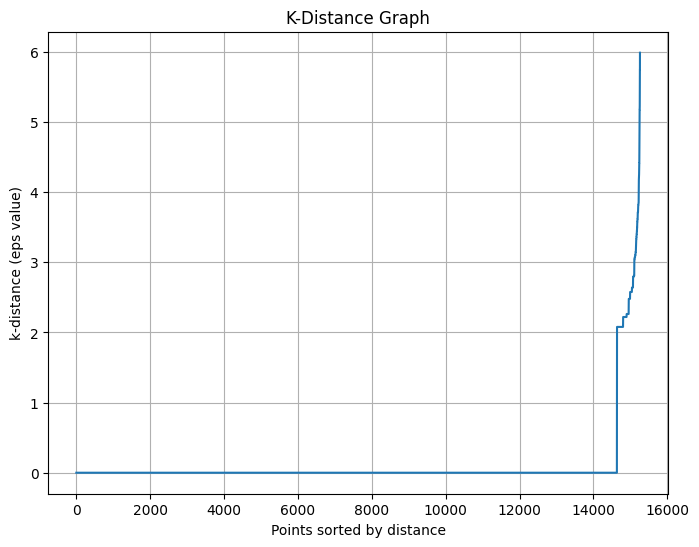

In [2260]:
# The distance to the furthest neighbor (min_samples-th nearest) for each point
k_dist = distances[:, min_samples-1]

# Sort distances
k_dist_sorted = np.sort(k_dist)

# 3. Plotting the k-distance graph
plt.figure(figsize=(8, 6))
plt.plot(k_dist_sorted)
plt.title('K-Distance Graph')
plt.xlabel('Points sorted by distance')
plt.ylabel('k-distance (eps value)')
plt.grid(True)
plt.show()

In [2261]:
chosen_eps = 2.5  # This is an example; choose this value based on the plot
dbscan = DBSCAN(eps=chosen_eps, min_samples=min_samples)

## Train the Model

In [2262]:
clusters = dbscan.fit_predict(X_scaled)

In [2263]:
pd.Series(clusters).value_counts()

21     3439
111    1009
41      982
151     798
51      643
       ... 
161       2
76        2
158       2
255       2
248       2
Name: count, Length: 290, dtype: int64

## K-means++

In [2264]:
knn_classifier = KNeighborsClassifier()

In [2265]:
wcss = []
for i in range(1, 20):  # Test 1 to 10 clusters
    kmeans = KMeans(n_clusters=i,
                    init='k-means++',
                    max_iter=1000,
                    n_init=10,
                    random_state=0)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)  # inertia_ is the WCSS

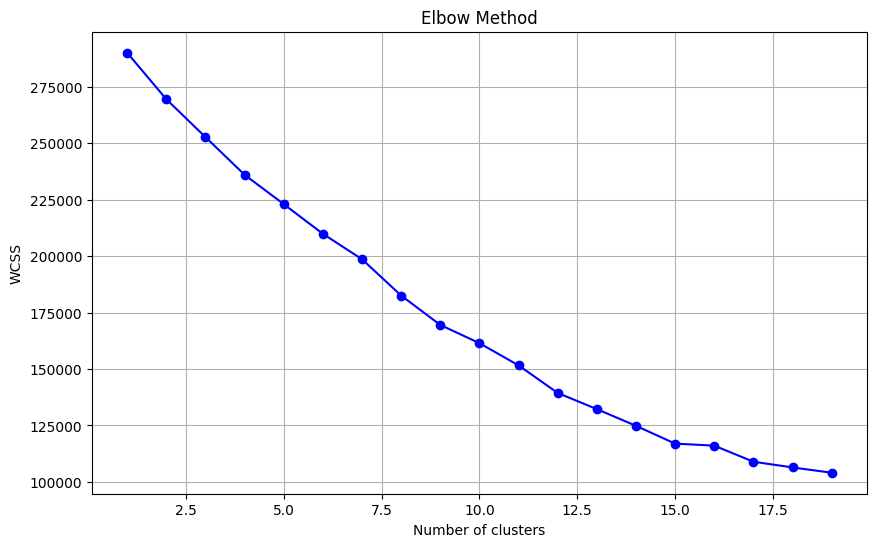

In [2266]:
# 3. Plot the Elbow Curve
plt.figure(figsize=(10, 6))
plt.plot(range(1, 20), wcss,  marker='o', linestyle='-', color='b')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

In [2267]:
optimal_clusters = 10 # This might change based on your actual elbow curve analysis
model = KMeans(n_clusters=optimal_clusters, init='k-means++', max_iter=1000, n_init=10, random_state=0)

#### Train the model

In [2294]:
# Fit the model on the training data
model = model.fit(X_scaled)
y_pred = model.predict(X_scaled)

In [2295]:
X['kmeans'] = y_pred

C:\Users\Sulaiman\AppData\Local\Temp\ipykernel_69580\353328013.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['kmeans'] = y_pred


In [2296]:
X['kmeans'].value_counts()

kmeans
9    3032
3    2693
1    2462
0    2139
2    2043
5    1082
6     689
4     581
7     313
8     228
Name: count, dtype: int64

In [2297]:
mlb_genres.classes_

array(['Action', 'Adventure', 'AvantGarde', 'AwardWinning', 'BoysLove',
       'Comedy', 'Drama', 'Ecchi', 'Fantasy', 'GirlsLove', 'Gourmet',
       'Horror', 'Mystery', 'Romance', 'Sci-Fi', 'SliceofLife', 'Sports',
       'Supernatural', 'Suspense', 'Unknown-Genre'], dtype=object)

In [2298]:
X.dtypes

Seasonal         bool
Action          int32
Adventure       int32
AvantGarde      int32
AwardWinning    int32
Comedy          int32
Drama           int32
Fantasy         int32
Horror          int32
Mystery         int32
Romance         int32
Sci-Fi          int32
SliceofLife     int32
Sports          int32
Supernatural    int32
Suspense        int32
Kids            int32
Seinen          int32
Shounen         int32
kmeans          int32
dtype: object

In [2299]:
mal_df['Genres']

0                [Adventure, Drama, Fantasy]
1        [Action, Adventure, Drama, Fantasy]
2                  [Drama, Sci-Fi, Suspense]
3                   [Action, Comedy, Sci-Fi]
4                  [Action, Drama, Suspense]
                        ...                 
15257                        [Unknown-Genre]
15258                        [Unknown-Genre]
15259                        [Unknown-Genre]
15260                               [Comedy]
15261                               [Comedy]
Name: Genres, Length: 15262, dtype: object

### Export the model

In [2306]:
import joblib
joblib.dump(model, 'Models/kMeans_model.joblib')
joblib.dump(scaler, 'Models/scaler.joblib')



['Models/scaler.joblib']

In [2307]:
joblib.dump(mlb_genres, 'Models/mlb_genres.joblib')
joblib.dump(mlb_demographics, 'Models/mlb_demographics.joblib')

['Models/mlb_demographics.joblib']

In [2303]:
ga['Seasonal'] = True


c:\Users\Sulaiman\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but KMeans was fitted without feature names
  warnings.warn(


array([3])

In [2305]:

model.predict(ga[selected_features])

c:\Users\Sulaiman\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but KMeans was fitted without feature names
  warnings.warn(


array([3])